# BFRO Sightings Data Clean and EDA

In [677]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [678]:
# Read in the raw data 
df = (pd.read_csv('data/bfro_raw.csv', index_col=0))
df.head()

,reportheader,reportclassification,year,season,month,state,county,nearest_town,observed,also_noticed,other_witnesses,other_stories,time_and_conditions,environment,country,province,location_details
0,Report # 13038,(Class A),2004,Winter,February,Alaska,Anchorage County,Anchorage / Hillside,I and two of my friends were bored one night s...,"Some tracks in the snow, and a clearing in the...",My two friends were snowmachining behind me bu...,I have not heard of any other incidents in Anc...,Middle of the night. The only light was the he...,"In the middle of the woods, in a clearing cove...",NaN,NaN,Up near powerline clearings east of Potter Mar...
1,Report # 8792,(Class B),2003,Winter,December,Alaska,Anchorage County,Anchorage,"Me and a couple of friends had been bored, whe...","We smelled of colonge and after shave, and one...","4. Me, w-man, warren and sean. We were at my h...",no,"Started at 11, ended at about 3-3:30. Weather ...","A pine forest, with a bog or swamp on the righ...",NaN,NaN,"Few houses on the way, a power relay station. ..."
2,Report # 1255,(Class B),1998,Fall,September,Alaska,Bethel County,NaN,My hunting buddy and I were sitting on a ridge...,nothing unusual,Scouting for caribou with high quality binoculars,NaN,NaN,Call Iliamna Air taxi for lat & Long of Long L...,NaN,NaN,"45 miles by air west of Lake Iliamna, Alaska i..."
3,Report # 11616,(Class B),2004,Summer,July,Alaska,Bristol Bay County,Egegik,"To whom it may concern, I am a commercial fish...",Just these foot prints and how obvious it was ...,"One other witness, and he was fishing prior to...","I've only heard of one other story, from an ol...","Approximately 12:30 pm, partially coudy/sunny.","Lake front,creek spit, gravel and sand, alder ...",NaN,NaN,"Approximately 95 miles east of Egegik, Alaska...."
4,Report # 637,(Class A),2000,Summer,June,Alaska,Cordova-McCarthy County,"Kennikot, Alaska",My hiking partner and I arrived late to the Ke...,I did hear what appeared to be grunting in the...,"I was the only witness, there was one other in...",NaN,About 12:00 Midnight / full moon / clear / dim...,This sighting was located at approximately 1 t...,NaN,NaN,"On the main trail toward the glacier, before t..."


In [679]:
# Defining function for cleaning and transforming data

def clean_df(df):
    
    def string_tweak(df_):
        df_['reportclassification'] = df_['reportclassification'].replace(['\(', '\)'], '', regex=True)
        df_['reportID'] = df_['reportheader'].str.split('#', expand=True).iloc[:,1]
        df_['nearest_town'] = df_['nearest_town'].str.split(',', expand=True).iloc[:, 0]
        df_['county'] = df_['county'].str.replace('County', '')
        return df_
    
    
    return (df
            .pipe(string_tweak)
            .astype({'reportID':'int'})
            .set_index('reportID')
            .drop('reportheader', axis=1)
            .assign(year=lambda df_: df_['year'].str.extract(r'(\b\d{4}\b)', expand=False))
            .dropna(subset=['year', 'month'])
            .astype({'reportclassification':'category', 'year': 'int', 'season':'category',
                     'county':'category', 'state':'category', 'month':'category',
                     'province':'category', 'country':'category', 'nearest_town':'category'})
           )



In [680]:
clean_df = clean_df(df)
clean_df.to_csv('data/bfro_clean.csv')

In [681]:
clean_df.sample(5)

,reportclassification,year,season,month,state,county,nearest_town,observed,also_noticed,other_witnesses,other_stories,time_and_conditions,environment,country,province,location_details
reportID,,,,,,,,,,,,,,,,
63646,Class B,2012,Fall,October,South Dakota,Lawrence,Spearfish,I would like to start by saying im an avid hu...,NaN,NaN,My friends told me they had told a guy my stor...,11pm and 2pm weather was clear to partly cloud...,Pine forest / aspen or birch thicket,NaN,NaN,I parked my vehicle at Devils Bathtub trailhea...
20457,Class A,1977,Winter,January,Michigan,Schoolcraft,Seney,When I was stationed in the U.P.of Michigan's ...,None.,Ed from Ohio and we have not talked since that...,Never.,Above.,"Do not remember,except there are many creeks,r...",NaN,NaN,Not sure of the county.Michigan's U.P. M-28 ea...
10945,Class A,2005,Spring,March,West Virginia,Jackson,Near milemarker 150,As we were driving...I was watching closely at...,NaN,My wife was in the car and driving. I told her...,NO!,Approximately 3:30 in the morning traveling no...,Fairly forested and hilly area.,NaN,NaN,We were traveling northbound on I-77 toward th...
4301,Class A,2002,Spring,May,Washington,Cowlitz,Toutle,"On May 9th, 2002 at approximately 3p.m. my bud...",Nothing unusual,Just myself. My buddy was driving.,No I haven't,Approximately 3 pm The sun was out and a few...,"Forests, wash area, creek and forest again. I...",NaN,NaN,Approximately 1 to 2 miles east of Hoffstead B...
35053,Class B,2012,Spring,April,Florida,Hillsborough,Not disclosed at this time,I was leaving saint petersburg with the intent...,NaN,NaN,NaN,"Night, cool, windy.","river side, forest, bridge, interstate.",NaN,NaN,NaN


## Extracting GPS Coordinates 
Some of the text fields contain GPS coordinates where sightings occured. These are found in multiple fields and in various formats. Here I am going to find those records that have some mention of 'gps', 'latitude', or 'longitude' then filter out those that contain any amount of numbers. Because the coordinates do not follow a format I am going to manually pull them out of filtered data and and transform into a unified decimal format. Coordinates and reportID are then saved to a csv that I pull in and merge with our cleaned dataframe.

In total I was able to find 100 reports with coordinates for where the sighting roughly occurred. Many any other reports do have text description of where sightings occured. 

In [695]:
def filter_coordinates(s):
    mask = s.dropna().str.lower().str.contains('gps|latitude|longitude|coordinates|coord', regex=True)
    return s.dropna().loc[mask]

# apply the function to all object columns using apply() and pipe()
def combine_text(df_):
    df_ = df_.assign(report = lambda df_: 
               df_['observed'].astype('str') + 
               ' ' + 
               df_['location_details'].astype('str')
              )
    df_ = df_['report'].str.replace('nan', '')
    return df_

In [696]:
coord_series = (clean_df.select_dtypes(include='object')
            .apply(filter_coordinates)
            .dropna(axis=1, how="all")
            .drop(axis=1, columns=['environment', 'also_noticed'])
            .pipe(combine_text)
         )

coord_series.head()

reportID
147    At our home south of South Lake Tahoe, we have...
637                                                     
685     Bohemia Mining District, about 15 miles East ...
693     South of Ukiah and just below Tower Mountain....
880     Starting in Colorado Springs, go west on I-24...
Name: report, dtype: object

In [697]:
coord_series.to_csv('data/coord.csv')

GPS Coordinates were then pulled out manually in a spreadsheet reformatted so all are in decimal form and exporte as a coord_clean.csv

In [705]:
coord_df = pd.read_csv('data/coord_clean.csv', index_col=0)
merged_df = pd.merge(clean_df, coord_df, on='reportID', how='left')
merged_df.sample(5)

,reportclassification,year,season,month,state,county,nearest_town,observed,also_noticed,other_witnesses,other_stories,time_and_conditions,environment,country,province,location_details,report,lat,long
reportID,,,,,,,,,,,,,,,,,,,
14638,Class A,2006,Spring,February,Texas,Wood,Quitman,My husband works on a huge ranch (about 750 ac...,This might or might not be anything but it is ...,None.,I have heard lots of people say they have hear...,Daytime. Cold.,Heavily wooded. Very secluded.,NaN,NaN,NaN,NaN,NaN,NaN
26711,Class B,2009,Fall,October,Oklahoma,Le Flore,Smithville,We were on our way to a rental cabin (Cloud 9 ...,none,My wife,"Just on TV, and your web site.",4:30pm,"overcast, daylight, no rain, very good visibility",NaN,NaN,NaN,NaN,NaN,NaN
3315,Class A,1997,Winter,December,Ohio,Adams,West Union near Lynx,"The sighting occured around l0 pm at night, we...",NaN,"Two witnesses, my wife and son, I saw the foot...","No, I mentioned it to the neighbors, but theyd...",Around 10 pm at night. It was agood weather n...,Very wooded and hilly terrain.,NaN,NaN,The nearest town that shows on a map is West U...,NaN,NaN,NaN
18219,Class A,2006,Summer,July,Missouri,Andrew,Amazonia,While traveling along Dark road skirting Monke...,NaN,none,Long time residents claim to outsiders that Mo...,between 12:30-1:00 am,Monkey Mountain Is a densely timber rocky bluf...,NaN,NaN,"""Monkey Mountain"" along Missouri River Bluffs,...",NaN,NaN,NaN
653,Class B,1987,Summer,June,Oregon,Clackamas,West Linn,"Screams or yells. A year later, these were con...",NaN,Wife was also present.,NaN,NaN,NaN,NaN,NaN,On Troon Drive (Located South of Village prope...,NaN,NaN,NaN


Index([ 1027, 10879,  1401, 15211, 22598,  2268, 24732, 26572, 26823,  3022,
       35789, 36514, 47536, 48359,  5251, 59102, 59396, 59757, 62340, 65464,
       65566, 65867, 65894, 66158, 67199, 67232, 67239, 67271, 67381, 67401,
       67413, 67423, 67425, 67480, 67556, 67590, 67602, 67875, 68899, 69015,
       69052, 69065,   693, 69304, 69316, 69411, 69469, 69614, 69641, 70712,
       70737, 71700, 71733, 71792, 71794, 71801, 71803, 71884, 71896, 71904,
       71920, 71929, 71997, 72029, 72040, 72081, 72111, 72131, 72142, 72175,
       72285, 72313, 73291, 74293, 74308, 74429, 74487, 74644, 74666, 74715,
       74788, 74793, 74818, 74829, 74981, 74987, 75057, 75097, 75126, 75162,
       75283, 75290, 75309, 75382, 75388, 75404, 75464, 75577, 75671,   880],
      dtype='int64', name='reportID')

<class 'pandas.core.frame.DataFrame'>
Index: 4663 entries, 13038 to 13061
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   reportclassification  4663 non-null   category
 1   year                  4663 non-null   int64   
 2   season                4663 non-null   category
 3   month                 4663 non-null   category
 4   state                 4421 non-null   category
 5   county                4421 non-null   category
 6   nearest_town          4404 non-null   category
 7   observed              4630 non-null   object  
 8   also_noticed          3083 non-null   object  
 9   other_witnesses       4181 non-null   object  
 10  other_stories         3379 non-null   object  
 11  time_and_conditions   4292 non-null   object  
 12  environment           4430 non-null   object  
 13  country               242 non-null    category
 14  province              242 non-null    category
 15  loca

<Axes: xlabel='state'>

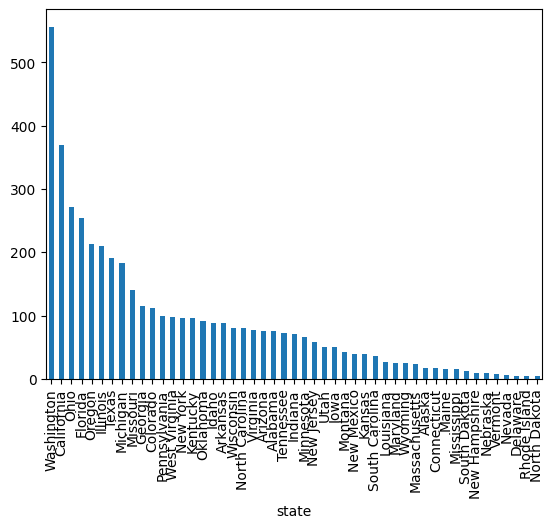

In [711]:
clean_df.other_witnesses.to_csv('data/witnesses.csv')